In [103]:

import PyDSTool as dst
from PyDSTool import args
import numpy as np
from matplotlib import pyplot as plt

In [104]:
pars = {'h': .01, 'A': 7.26722e27,'n': 3.5,'Q': 52.,'iPe': 30, 'Di': 20.}
edot0 = 1.e-11

pars['A']=6500/edot0*5e4**3.5*1e4**-2
icdict = {'T': 1,'tau': 0.}
Tstr = '(iPe)*(1.-T)+Di*h*(A*tau**n)*exp(-Q/T)'
taustr = '2*(1-h*(A*tau**n)*exp(-Q/T))'
print pars['A']

1.81680523172e+23


In [105]:
event_T_A = dst.makeZeroCrossEvent('T-A', 0,
                            {'name': 'event_T_A',
                             'eventtol': 1e-6,
                             'term': False,
                             'active': True},
                    varnames=['T'], parnames=['A'],
                    targetlang='python')


$$\vec{X}= \begin{pmatrix}  T \\ 
\tau \end{pmatrix} $$

$$\vec{X}'= \underline{F}(\vec{X})$$

$$\underline{F}(\vec{X})=\begin{pmatrix} \frac{1}{Pe}(1-T)+Di(h)(A\tau^{n}e^{-Q/T}) \\
 2(1-h(A\tau^{n}e^{-Q/T}))\end{pmatrix}$$
the jacobian:
$$\underline{J}(\vec{X})=\begin{pmatrix}  \frac{\partial F_T}{\partial T} & \frac{\partial F_T}{\partial \tau}\\
         \frac{\partial F_\tau}{\partial T} & \frac{\partial F_\tau}{\partial\tau} \end{pmatrix}$$

In [106]:

DSargs = args(name='T v tau')  # struct-like data
#DSargs.events = [event_T_A]
DSargs.pars = pars
DSargs.tdata = [0, 1]
DSargs.algparams = {'max_pts': 3000, 'init_step': 0.02, 'stiff': False}
DSargs.varspecs = {'T': Tstr, 'tau': taustr}
DSargs.xdomain = {'T': [0.,5], 'tau': [0., 5]}
DSargs.fnspecs = {'Jacobian': (['t','T','tau'],
                                """[[-iPe + (Di)*(h)*(A)*(tau**n)*(Q/T/T)*(exp(-Q/T)), (Di)*(h)*(A)*exp(-Q/T)*(n)*tau**(n-1)],
                                    [-2*(h)*(A)*(tau**n)*(Q/T/T)*exp(-Q/T)  ,  -2*(A)*exp(-Q/T)*(h)*(n)*tau**(n-1)]]""")}
DSargs.ics = icdict
vdp = dst.Vode_ODEsystem(DSargs)


Pointset <no name> (parameterized)Coordinates: ['T', 'tau']


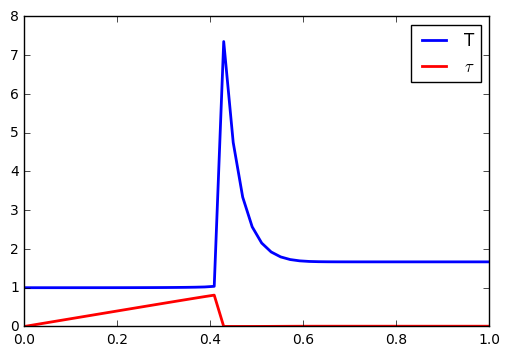

In [107]:
traj = vdp.compute('test_traj')
pts = traj.sample()
print pts
#evs = traj.getEvents('event_x_a')

# figure 1 is the time evolution of the two variables
plt.figure(1)
plt.plot(pts['t'], pts['T'], 'b', linewidth=2,label='T')
plt.plot(pts['t'], pts['tau'], 'r', linewidth=2,label='$\\tau$')
plt.legend(loc='best')
plt.show()

In [94]:
print DSargs.varspecs


{'tau': '2*(1-h*(A*tau**n)*exp(-Q/T))', 'T': '(iPe)*(1.-T)+Di*h*(A*tau**n)*exp(-Q/T)'}


In [89]:
h =.01
A = 7.26722e27
n = 3.5
Q = 52.
iPe = 1. 
Di = .01
T = 1.
tau = .01
dT= (iPe)*(1.-T)+Di*h*(A*tau**n)*np.exp(-Q/T)
dtau = 2*(1-h*(A*tau**n)*np.exp(-Q/T))
print dT, dtau
print (A*tau**n)*np.exp(-Q/T)

1.89694722607e-06 1.99962061055
0.0189694722607


In [81]:
print A*np.exp(-Q/T)

189694.722607


In [82]:
print Di*h*tau**n

1e-11
